In [ ]:
import pandas as pd
import numpy as np

In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/기술 세미나/3차/credit_risk_dataset.csv')

# 독일 신용 위험 데이터
- Age : 나이
- Sex : 성별
- Job : 0-비숙련 비거주 , 1- 비숙련 거주, 2-숙련, 3-고도로 숙련
- Housing : Own-자가, rent-렌트, free-무료
- Saving accounts : 저축계좌금액
- Checking account : 자주사용하는 계좌금액
- Credit amount : 대출금액
- Duration : 대출 기간
- Purpose : 대출목적

In [ ]:
credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
print(credit.shape)
credit = credit.drop_duplicates()

(32581, 12)


In [ ]:
credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [ ]:
# #불필요한 컬럼 삭제
credit.drop(['cb_person_default_on_file'], axis = 1, inplace = True)

<ipython-input-7-72f452010195>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit.drop(['cb_person_default_on_file'], axis = 1, inplace = True)


In [ ]:
credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,26


In [ ]:
credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


Text(0.5, 0, 'Attributes')

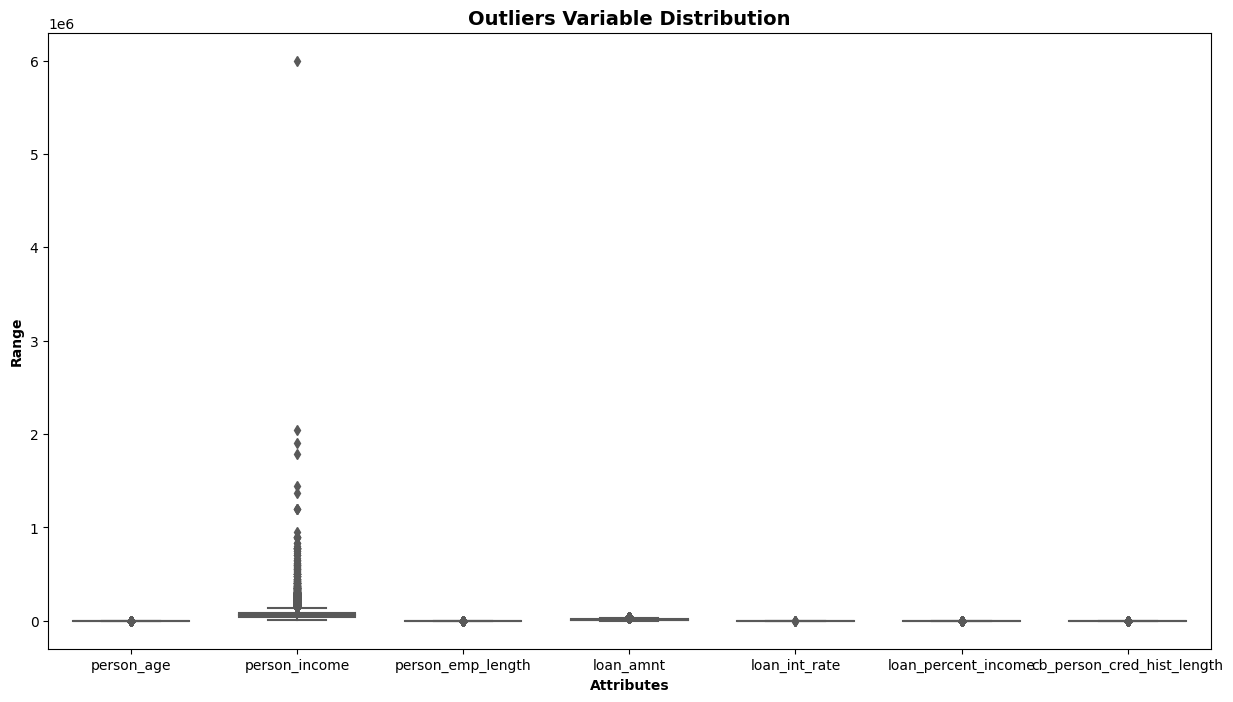

In [ ]:
# 이상치 분석
import seaborn as sns
import matplotlib.pyplot as plt
attributes = ['person_age','person_income','person_emp_length', 'loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
plt.rcParams['figure.figsize'] = [15,8]
sns.boxplot(data = credit[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Text(0.5, 0, 'Attributes')

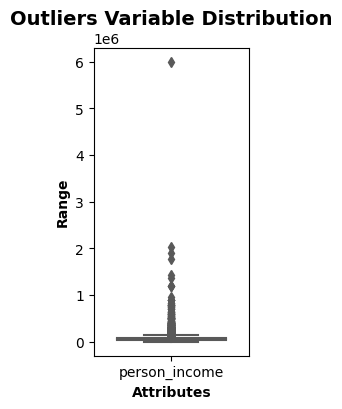

In [ ]:
# 이상치 분석
import seaborn as sns
import matplotlib.pyplot as plt
attributes = ['person_income']
plt.rcParams['figure.figsize'] = [2,4]
sns.boxplot(data = credit[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
Q1 = credit.person_age.quantile(0.05)
Q3 = credit.person_age.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.person_age >= Q1 - 1.5*IQR) & (credit.person_age <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = credit.person_income.quantile(0.05)
Q3 = credit.person_income.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.person_income >= Q1 - 1.5*IQR) & (credit.person_income <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = credit.person_emp_length.quantile(0.05)
Q3 = credit.person_emp_length.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.person_emp_length >= Q1 - 1.5*IQR) & (credit.person_emp_length <= Q3 + 1.5*IQR)]
#
Q1 = credit.loan_amnt.quantile(0.05)
Q3 = credit.loan_amnt.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.loan_amnt >= Q1 - 1.5*IQR) & (credit.loan_amnt <= Q3 + 1.5*IQR)]
#
Q1 = credit.loan_int_rate.quantile(0.05)
Q3 = credit.loan_int_rate.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.loan_int_rate >= Q1 - 1.5*IQR) & (credit.loan_int_rate <= Q3 + 1.5*IQR)]
#
Q1 = credit.loan_percent_income.quantile(0.05)
Q3 = credit.loan_percent_income.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.loan_percent_income >= Q1 - 1.5*IQR) & (credit.loan_percent_income <= Q3 + 1.5*IQR)]
#
Q1 = credit.cb_person_cred_hist_length.quantile(0.05)
Q3 = credit.cb_person_cred_hist_length.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.cb_person_cred_hist_length >= Q1 - 1.5*IQR) & (credit.cb_person_cred_hist_length <= Q3 + 1.5*IQR)]

In [ ]:
credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28366.000000,28366.000000,28366.000000,28366.000000,28366.000000,28366.000000,28366.000000,28366.000000
mean,27.664845,64552.598921,4.768984,9630.670521,11.043691,0.217690,0.170043,5.770570
std,6.053352,37851.577759,4.016110,6295.113810,3.230788,0.412683,0.106263,3.998673
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,23.000000,39121.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,55396.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79815.000000,7.000000,12400.000000,13.480000,0.000000,0.230000,8.000000
max,67.000000,310400.000000,31.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
1,21,9600,OWN,5.000,EDUCATION,B,1000,11.140,0,0.100,2
2,25,9600,MORTGAGE,1.000,MEDICAL,C,5500,12.870,1,0.570,3
3,23,65500,RENT,4.000,MEDICAL,C,35000,15.230,1,0.530,2
4,24,54400,RENT,8.000,MEDICAL,C,35000,14.270,1,0.550,4
5,21,9900,OWN,2.000,VENTURE,A,2500,7.140,1,0.250,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.000,PERSONAL,C,5800,13.160,0,0.110,30
32577,54,120000,MORTGAGE,4.000,PERSONAL,A,17625,7.490,0,0.150,19
32578,65,76000,RENT,3.000,HOMEIMPROVEMENT,B,35000,10.990,1,0.460,28
32579,56,150000,MORTGAGE,5.000,PERSONAL,B,15000,11.480,0,0.100,26


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
credit['person_home_ownership'] = label_encoder.fit_transform(credit['person_home_ownership'])
credit['loan_intent'] = label_encoder.fit_transform(credit['loan_intent'])
credit['loan_grade'] = label_encoder.fit_transform(credit['loan_grade'])

In [ ]:
credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
1,21,9600,2,5.000,1,1,1000,11.140,0,0.100,2
2,25,9600,0,1.000,3,2,5500,12.870,1,0.570,3
3,23,65500,3,4.000,3,2,35000,15.230,1,0.530,2
4,24,54400,3,8.000,3,2,35000,14.270,1,0.550,4
5,21,9900,2,2.000,5,0,2500,7.140,1,0.250,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.000,4,2,5800,13.160,0,0.110,30
32577,54,120000,0,4.000,4,0,17625,7.490,0,0.150,19
32578,65,76000,3,3.000,2,1,35000,10.990,1,0.460,28
32579,56,150000,0,5.000,4,1,15000,11.480,0,0.100,26


In [ ]:
credit_2 = credit[['person_age', 'person_income','person_home_ownership',
                 'person_emp_length','loan_intent','loan_status','loan_amnt','loan_int_rate'
                 ,'loan_percent_income','cb_person_cred_hist_length','loan_grade']]

In [ ]:
credit_2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_status,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade
1,21,9600,2,5.000,1,0,1000,11.140,0.100,2,1
2,25,9600,0,1.000,3,1,5500,12.870,0.570,3,2
3,23,65500,3,4.000,3,1,35000,15.230,0.530,2,2
4,24,54400,3,8.000,3,1,35000,14.270,0.550,4,2
5,21,9900,2,2.000,5,1,2500,7.140,0.250,2,0
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.000,4,0,5800,13.160,0.110,30,2
32577,54,120000,0,4.000,4,0,17625,7.490,0.150,19,0
32578,65,76000,3,3.000,2,1,35000,10.990,0.460,28,1
32579,56,150000,0,5.000,4,0,15000,11.480,0.100,26,1


In [ ]:
credit_2.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_status,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade
count,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000
mean,27.665,64552.599,1.685,4.769,2.530,0.218,9630.671,11.044,0.170,5.771,1.229
std,6.053,37851.578,1.434,4.016,1.730,0.413,6295.114,3.231,0.106,3.999,1.171
min,20.000,4000.000,0.000,0.000,0.000,0.000,500.000,5.420,0.010,2.000,0.000
25%,23.000,39121.000,0.000,2.000,1.000,0.000,5000.000,7.900,0.090,3.000,0.000
50%,26.000,55396.000,3.000,4.000,3.000,0.000,8000.000,10.990,0.150,4.000,1.000
75%,30.000,79815.000,3.000,7.000,4.000,0.000,12400.000,13.480,0.230,8.000,2.000
max,67.000,310400.000,3.000,31.000,5.000,1.000,35000.000,23.220,0.830,30.000,6.000


In [ ]:
credit_3 = pd.get_dummies(credit['loan_grade'], prefix='class')

In [ ]:
credit_3

,class_0,class_1,class_2,class_3,class_4,class_5,class_6
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
32576,0,0,1,0,0,0,0
32577,1,0,0,0,0,0,0
32578,0,1,0,0,0,0,0
32579,0,1,0,0,0,0,0


In [ ]:
credit_2 = pd.concat([credit_2, credit_3], axis=1)
credit_2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_status,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,class_0,class_1,class_2,class_3,class_4,class_5,class_6
1,21,9600,2,5.000,1,0,1000,11.140,0.100,2,1,0,1,0,0,0,0,0
2,25,9600,0,1.000,3,1,5500,12.870,0.570,3,2,0,0,1,0,0,0,0
3,23,65500,3,4.000,3,1,35000,15.230,0.530,2,2,0,0,1,0,0,0,0
4,24,54400,3,8.000,3,1,35000,14.270,0.550,4,2,0,0,1,0,0,0,0
5,21,9900,2,2.000,5,1,2500,7.140,0.250,2,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.000,4,0,5800,13.160,0.110,30,2,0,0,1,0,0,0,0
32577,54,120000,0,4.000,4,0,17625,7.490,0.150,19,0,1,0,0,0,0,0,0
32578,65,76000,3,3.000,2,1,35000,10.990,0.460,28,1,0,1,0,0,0,0,0
32579,56,150000,0,5.000,4,0,15000,11.480,0.100,26,1,0,1,0,0,0,0,0


In [ ]:
credit_2.drop(['loan_grade'], axis = 1, inplace = True)


In [ ]:
credit_2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_status,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,class_0,class_1,class_2,class_3,class_4,class_5,class_6
1,21,9600,2,5.000,1,0,1000,11.140,0.100,2,0,1,0,0,0,0,0
2,25,9600,0,1.000,3,1,5500,12.870,0.570,3,0,0,1,0,0,0,0
3,23,65500,3,4.000,3,1,35000,15.230,0.530,2,0,0,1,0,0,0,0
4,24,54400,3,8.000,3,1,35000,14.270,0.550,4,0,0,1,0,0,0,0
5,21,9900,2,2.000,5,1,2500,7.140,0.250,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.000,4,0,5800,13.160,0.110,30,0,0,1,0,0,0,0
32577,54,120000,0,4.000,4,0,17625,7.490,0.150,19,1,0,0,0,0,0,0
32578,65,76000,3,3.000,2,1,35000,10.990,0.460,28,0,1,0,0,0,0,0
32579,56,150000,0,5.000,4,0,15000,11.480,0.100,26,0,1,0,0,0,0,0


In [ ]:
credit9 = credit_2.iloc[:, -7:]
credit9

,class_0,class_1,class_2,class_3,class_4,class_5,class_6
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
32576,0,0,1,0,0,0,0
32577,1,0,0,0,0,0,0
32578,0,1,0,0,0,0,0
32579,0,1,0,0,0,0,0


In [ ]:
# credit['loan_grade'].unique()

In [ ]:
# credit_1 = pd.get_dummies(credit['loan_grade'], prefix='class')

In [ ]:
# credit_1

In [ ]:
# credit_2 = pd.concat([credit, credit_1], axis=1)

In [ ]:
# credit_2

In [ ]:
# credit_2.drop(['loan_grade'], axis = 1, inplace = True)

In [ ]:
# credit_2

#데이터 셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from  sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

credit_2_onehot_minmax = credit_2.copy() # 원본 복사
credit_2_onehot_minmax = pd.DataFrame(minmax.fit_transform(credit_2_onehot_minmax),
                            columns=credit_2_onehot_minmax.columns)

X = credit_2_onehot_minmax.drop(['class_0','class_1','class_2','class_3','class_4','class_5','class_6'], axis=1)
y = credit_2_onehot_minmax.loc[:, ['class_0','class_1','class_2','class_3','class_4','class_5','class_6']]

# sklearn의 train_test_split을 가지고 오셔서 훈련용 80%, 검증용 20%로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((22692, 10), (22692, 7), (5674, 10), (5674, 7))

In [ ]:
y

,class_0,class_1,class_2,class_3,class_4,class_5,class_6
0,0.000,1.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,1.000,0.000,0.000,0.000,0.000
2,0.000,0.000,1.000,0.000,0.000,0.000,0.000
3,0.000,0.000,1.000,0.000,0.000,0.000,0.000
4,1.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...
28361,0.000,0.000,1.000,0.000,0.000,0.000,0.000
28362,1.000,0.000,0.000,0.000,0.000,0.000,0.000
28363,0.000,1.000,0.000,0.000,0.000,0.000,0.000
28364,0.000,1.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2,
#                                                     random_state=42)

In [ ]:
# first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
# second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]
# first_cluster_test = X_test[X_test.Clusters == 0].iloc[:, :-1]
# second_cluster_test = X_test[X_test.Clusters == 1].iloc[:, :-1]

In [ ]:
# X_train1 = first_cluster_train
# y_train1 = y_train[y_train.Clusters ==0]['Risk']

In [ ]:
# X_test1 = first_cluster_test
# y_test1 = y_test[y_test.Clusters == 0]['Risk']

In [ ]:
# X_train2 = second_cluster_train
# y_train2 = y_train[y_train.Clusters == 1]['Risk']
# X_test2 = second_cluster_test
# y_test2 = y_test[y_test.Clusters == 1]['Risk']

# 딥러닝 채무불이행 추정

In [ ]:
model = []

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(10,)))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=7, activation='softmax'))

# 모델이 일하는 방법을 정의 !
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델에게 데이터를 학습 !
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.25 )

In [ ]:
# 모델이 일하는 방법을 정의해줍니다 compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델에게 실제 데이터를 학습시킵니다 fit
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.25 )

Epoch 1/50
1064/1064 [==============================] - 7s 4ms/step - loss: 1.1674 - accuracy: 0.4888 - val_loss: 0.5033 - val_accuracy: 0.8100
Epoch 2/50
1064/1064 [==============================] - 4s 3ms/step - loss: 0.4426 - accuracy: 0.8221 - val_loss: 0.3951 - val_accuracy: 0.8481
Epoch 3/50
1064/1064 [==============================] - 3s 3ms/step - loss: 0.3907 - accuracy: 0.8488 - val_loss: 0.3870 - val_accuracy: 0.8456
Epoch 4/50
1064/1064 [==============================] - 3s 3ms/step - loss: 0.3723 - accuracy: 0.8555 - val_loss: 0.3657 - val_accuracy: 0.8516
Epoch 5/50
1064/1064 [==============================] - 5s 4ms/step - loss: 0.3630 - accuracy: 0.8571 - val_loss: 0.3541 - val_accuracy: 0.8655
Epoch 6/50
1064/1064 [==============================] - 5s 5ms/step - loss: 0.3594 - accuracy: 0.8576 - val_loss: 0.3514 - val_accuracy: 0.8641
Epoch 7/50
1064/1064 [==============================] - 5s 4ms/step - loss: 0.3557 - accuracy: 0.8628 - val_loss: 0.3512 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

178/178 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8683


[0.32694920897483826, 0.8683468699455261]

In [ ]:
result = model.predict(X_test)
result_1 = pd.DataFrame(result)
result_1.head()
y_test.head()

178/178 [==============================] - 0s 1ms/step


In [ ]:
result_1 = pd.DataFrame(result)

In [ ]:
result_1.head()

,0,1,2,3,4,5,6
0,0.001,0.963,0.034,0.002,0.000,0.000,0.000
1,0.997,0.003,0.000,0.000,0.000,0.000,0.000
2,0.000,0.004,0.960,0.036,0.000,0.000,0.000
3,0.000,0.924,0.072,0.004,0.000,0.000,0.000
4,0.831,0.169,0.000,0.000,0.000,0.000,0.000


In [ ]:
y_test.head()

,class_0,class_1,class_2,class_3,class_4,class_5,class_6
18929,0.000,1.000,0.000,0.000,0.000,0.000,0.000
12129,1.000,0.000,0.000,0.000,0.000,0.000,0.000
23479,0.000,0.000,1.000,0.000,0.000,0.000,0.000
5787,0.000,1.000,0.000,0.000,0.000,0.000,0.000
24576,1.000,0.000,0.000,0.000,0.000,0.000,0.000
